In [9]:
import pandas as pd

In [40]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


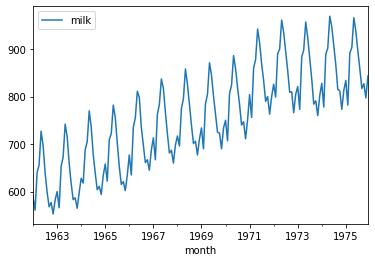

In [41]:
milk.plot()

In [42]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [43]:
round(0.627426708603034,2)

0.63

In [44]:
from calendar import monthrange

In [45]:
milk.iloc[0]

milk    589
Name: 1962-01-01 00:00:00, dtype: int64

In [46]:
import numpy as np

In [47]:
years=np.arange(1962,1976)
years

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975])

In [48]:
month=np.arange(1,13)
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [49]:
count=0
for i in range(len(years)):
    for j in range(len(month)):
        milk.iloc[count]/=monthrange(years[i],month[j])[1]
        count+=1
milk

,milk
month,
1962-01-01,19.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613
...,...
1975-08-01,27.677419
1975-09-01,27.233333
1975-10-01,26.677419


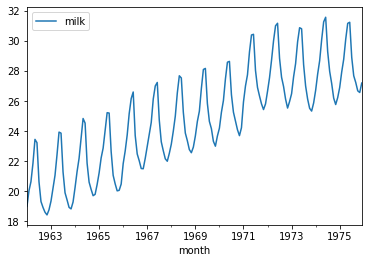

In [50]:
milk.plot()

In [53]:
round(milk.sum(),2)

milk    4166.33
dtype: float64

In [60]:
milk_daily_diff1= milk.milk - milk.milk.shift(1)

In [62]:
milk_daily_diff1.dropna(inplace=True)

In [64]:
milk_daily_diff1

month
1962-02-01    1.035714
1962-03-01    0.609447
1962-04-01    1.221505
1962-05-01    1.584946
1962-06-01   -0.218280
                ...   
1975-08-01   -1.225806
1975-09-01   -0.444086
1975-10-01   -0.555914
1975-11-01   -0.110753
1975-12-01    0.626882
Name: milk, Length: 167, dtype: float64

In [78]:
sm.tsa.stattools.adfuller(milk_daily_diff1)

(-2.759469476228902,
 0.0643005465417483,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

=> после однокрастного дифференцирования ряд все еще модет быть нестационарным

In [79]:
milk_daily_diff12= milk.milk - milk.milk.shift(12)
milk_daily_diff12.dropna(inplace=True)
milk_daily_diff12

month
1963-01-01    0.354839
1963-02-01    0.178571
1963-03-01    0.419355
1963-04-01    0.566667
1963-05-01    0.483871
                ...   
1975-08-01   -0.290323
1975-09-01    0.066667
1975-10-01    0.483871
1975-11-01    0.800000
1975-12-01    0.967742
Name: milk, Length: 156, dtype: float64

In [80]:
sm.tsa.stattools.adfuller(milk_daily_diff12)

(-2.1594860932888085,
 0.22127672658830344,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

=> после сезонного дифференцирования ряд не стал стационарным

In [83]:
milk_diff_12_1=milk_daily_diff12-milk_daily_diff12.shift(1)
milk_diff_12_1.dropna(inplace=True)
milk_diff_12_1

month
1963-02-01   -0.176267
1963-03-01    0.240783
1963-04-01    0.147312
1963-05-01   -0.082796
1963-06-01    0.149462
                ...   
1975-08-01    0.096774
1975-09-01    0.356989
1975-10-01    0.417204
1975-11-01    0.316129
1975-12-01    0.167742
Name: milk, Length: 155, dtype: float64

In [85]:
sm.tsa.stattools.adfuller(milk_diff_12_1)

(-5.481326334796932,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

=> нулевая гипотеза о нестационарности ряда отвергается в пользу альтернативы после последовательног применения сезонного и обычного дифференцирования

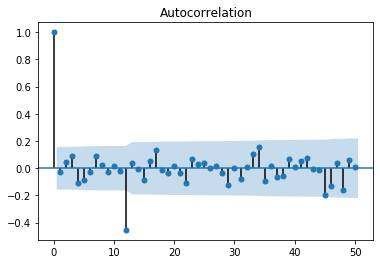

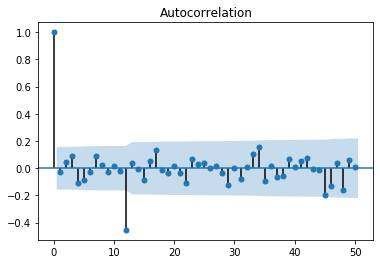

In [86]:
sm.graphics.tsa.plot_acf(milk_diff_12_1.values.squeeze(), lags=50)

=> Q=1 (12 сезонззый лаг/12)

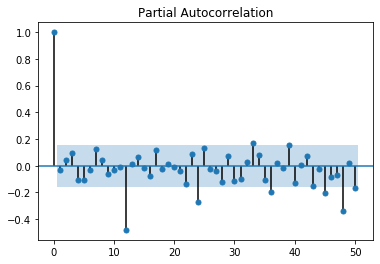

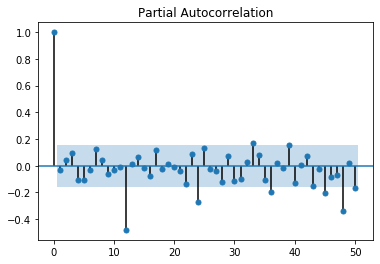

In [87]:
sm.graphics.tsa.plot_pacf(milk_diff_12_1.values.squeeze(), lags=50)

=> p=0